In [1]:
# import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

# Data Overview

In [2]:
# read the data from the csv file
df = pd.read_csv('data\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

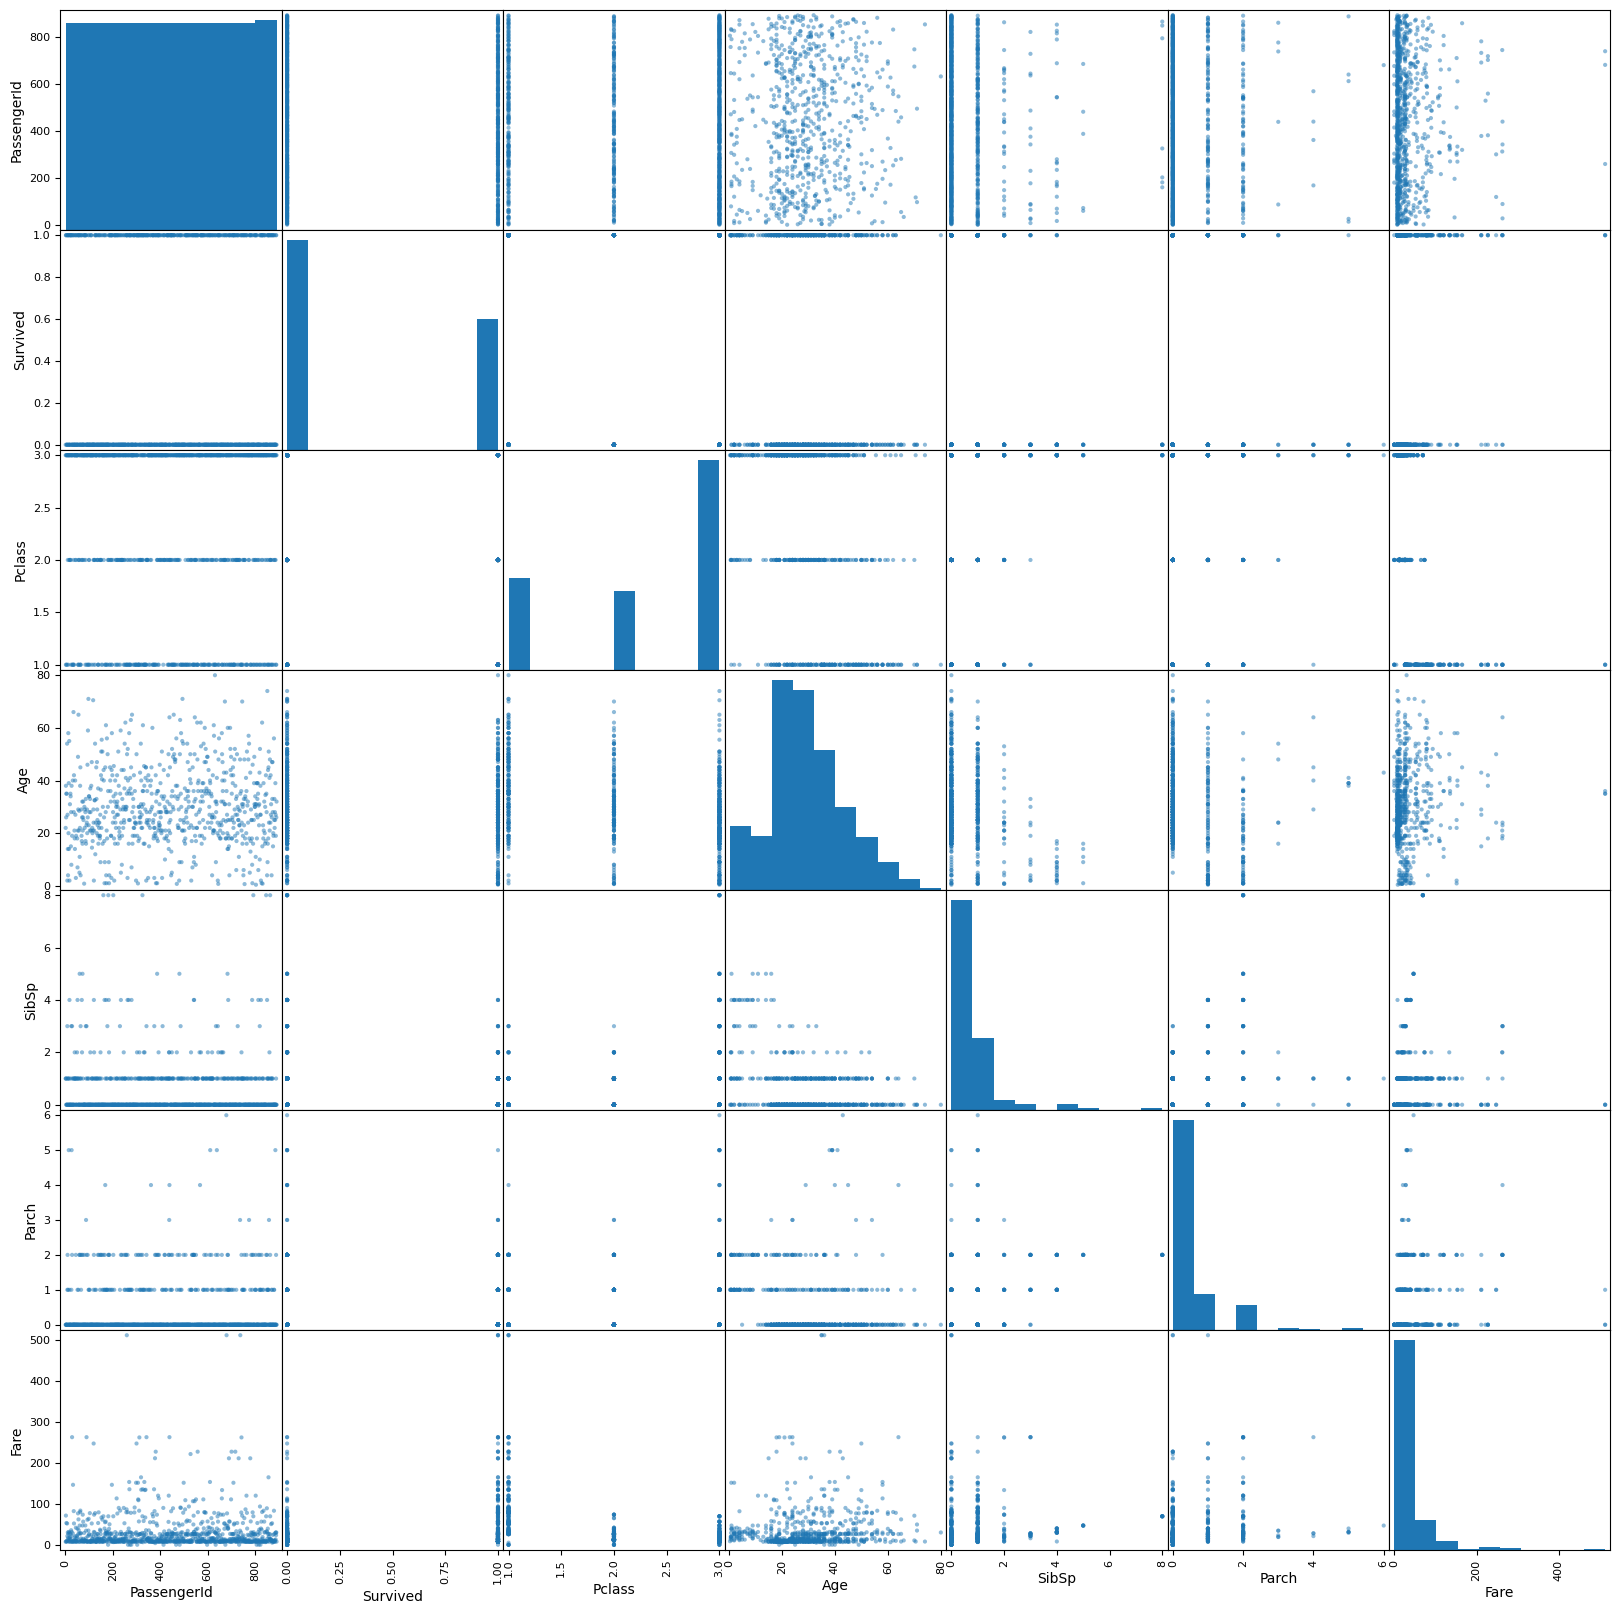

In [6]:
# scatter matrix plot
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

# Data Processing

In [7]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
# Encode the "Sex" column into 0 and 1
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [9]:
# Encode the "Embarked" column into 0, 1, and 2
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [10]:
# impute the missing values in the "Embarked" column with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_28420\3649172297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
# impute the missing value in the Age colum with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
# drop the "PassengerId", "Name", "Ticket", and "Cabin" columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Analysis

In [43]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


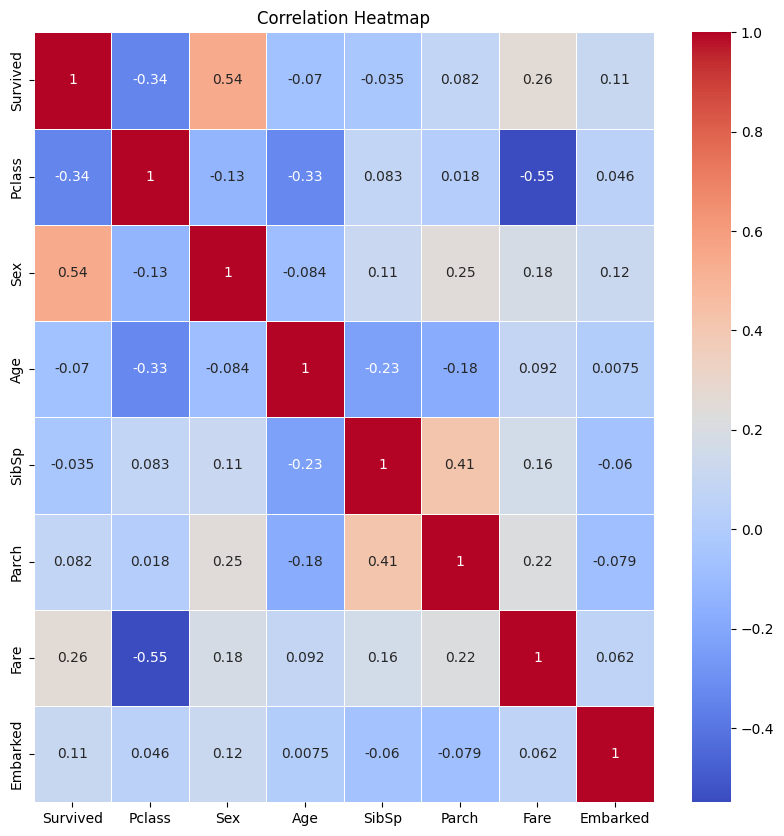

In [41]:
# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# spit the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a list of classification models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),  # SVM
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),  # GBC
    ('K-Nearest Neighbors', KNeighborsClassifier()),  # KNN
    ('Decision Tree', DecisionTreeClassifier()),  # DT
    ('AdaBoost', AdaBoostClassifier()),  # AdaBoost
    ('Gaussian Naive Bayes', GaussianNB()),  # GNB
    ('Stochastic Gradient Descent', SGDClassifier()),  # SGD
    ('XGBoost_1', xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)),
    ('XGBoost_2', xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)),
]

# Assuming X_train, y_train, X_test, and y_test are defined elsewhere in your code
# Evaluate each model in turn
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Note: The conversion to binary is not needed for all models, especially for those that inherently predict class labels.
    # This line should be adjusted based on the output type of your models.
    # y_pred = (y_pred > 0.5).astype(int)  # Convert predictions to binary for classification tasks
    
    print(f"{name}:")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print("\n")


Logistic Regression:
Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [20 54]]


Random Forest:
Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
 [[92 13]
 [20 54]]


Support Vector Machine:
Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   s

c:\Users\visha\anaconda3\envs\mll\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBoost_1:
Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[91 14]
 [15 59]]


XGBoost_2:
Accuracy: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[92 13]
 [15 59]]




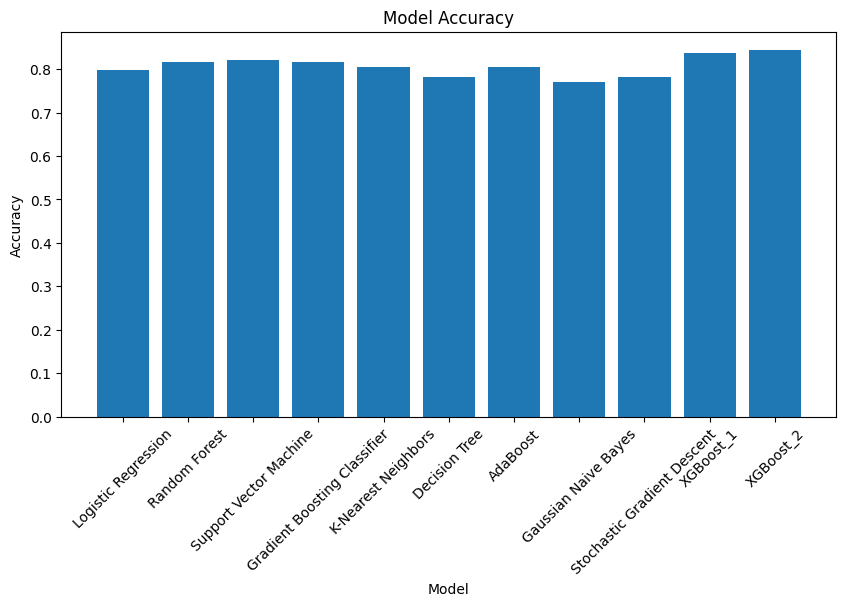

In [40]:
# plot the accuracy of each model using a bar chart
model_names = [name for name, _ in models]
accuracy = [accuracy_score(y_test, model.predict(X_test)) for _, model in models]
precision = [classification_report(y_test, model.predict(X_test), output_dict=True)['0']['precision'] for _, model in models]
recall = [classification_report(y_test, model.predict(X_test), output_dict=True)['0']['recall'] for _, model in models]
f1 = [classification_report(y_test, model.predict(X_test), output_dict=True)['0']['f1-score'] for _, model in models]


plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.show()

In [35]:
# print out the accuracy of each model
for name, model in models:
    print(f"{name} Accuracy: {accuracy_score(y_test, model.predict(X_test))}")


Logistic Regression Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8156424581005587
Support Vector Machine Accuracy: 0.8212290502793296
Gradient Boosting Classifier Accuracy: 0.8156424581005587
K-Nearest Neighbors Accuracy: 0.8044692737430168
Decision Tree Accuracy: 0.7821229050279329
AdaBoost Accuracy: 0.8044692737430168
Gaussian Naive Bayes Accuracy: 0.770949720670391
Stochastic Gradient Descent Accuracy: 0.7821229050279329
XGBoost_1 Accuracy: 0.8379888268156425
XGBoost_2 Accuracy: 0.8435754189944135


In [21]:
# save the XGBClassifier models[10][1]
best_model = models[10][1]
best_model.save_model('model.json')

In [22]:
# neural network models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
neural_networks = [
    ('Neural Network 1', keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(7,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])),
    ('Neural Network 2', keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(7,)),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])),
    ('Neural Network 3', keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(7,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])),
    ('Neural Network 4', keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(7,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
        ])
    )
]


In [23]:
# early stopping and reduce learning rate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(patience=10)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

In [24]:
for name, model in neural_networks:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])


Epoch 1/100
23/23 [==============================] - 2s 2ms/step - loss: 0.6664 - accuracy: 0.6306 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7528 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7795 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8048 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8062 - lr: 0.0010
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8062 - lr: 0.0010
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8104 - lr: 0.0010
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4250 - accuracy: 0.8118 - lr: 0.0010
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8132 - lr:

In [25]:
for name, model in neural_networks:
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    print(f"{name}:")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print("\n")

6/6 [==============================] - 0s 4ms/step
Neural Network 1:
Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[96  9]
 [21 53]]


6/6 [==============================] - 0s 0s/step
Neural Network 2:
Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[95 10]
 [24 50]]


6/6 [==================

# Make predictions

In [26]:
# import data for predictions
df_test = pd.read_csv('data\\test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
# drop the "PassengerId", "Name", "Ticket", and "Cabin" columns
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [28]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [29]:
# encode the "Sex" column into 0 and 1
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})

# encode the "Embarked" column into 0, 1, and 2
df_test['Embarked'] = df_test['Embarked'].map({'S':0, 'C':1, 'Q':2})

# impute the missing values in the "Age" column with the mean value
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

# impute the missing value in the "Fare" column with the mean value
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [30]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
# normalize the data
df_test = scaler.transform(df_test)

In [32]:
# make predictions using the XGBoost_2
y_pred = models[10][1].predict(df_test)

# Convert predictions to binary for classification tasks
y_pred = (y_pred > 0.5).astype(int)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# create a csv file with exactly 418 entries plus a header row (PassengerId and Survived)
# use y_pred to fill in the Survived column
df_submission = pd.read_csv('data\\test.csv')
df_submission['Survived'] = y_pred
df_submission = df_submission[['PassengerId', 'Survived']]
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [34]:
# save the dataframe as a csv file
df_submission.to_csv('submission.csv', index=False)